# Lab Tutorials

This workbook will go over the material covered to perform analysis on the data you gathered in the wave lab. 

There are nearly a hundred files and many hundreds of thousands of records in the data set you collected. While this would be painful bordering on impossible in Excel, it can be done easily using a programming language. While Matlab or R are options, we will use [Python](https://www.python.org/) because it has one of the very best data analysis libraries, it is easy to use, and is open source. 

Programming is one of the most employable skills you can develop. If you have never done any programming before, you should start by completing a basic tutorial course. The [offshore blakboard site](https://blackboard.soton.ac.uk/webapps/blackboard/content/listContentEditable.jsp?content_id=_3963975_1&course_id=_183392_1) has a link to two such tutorials, but there are literally hundreds of other options on the web. These typically only take around 2-4 hours to complete and will make all the difference to a novice completing the lab report.

### Preliminaries

This document was written as a [Jupyter notebook](http://jupyter.org/). If you are using your own computer you should download and install [Anaconda](https://www.anaconda.com/download) which include Python, Jupyter and all the major Python packages. The university computers already have anaconda installed. 

You should also download [the lab data file](https://www.dropbox.com/s/1xvxhoi09mzd85g/wavelab2018.zip?dl=0). This has all the data from the lab groups. Copy this notebook file into the `Processing` folder of that zip file. There is already a python file called `analysis.py` in that folder. 

Open this notebook file with Jupyter (choose Python 3 if you are given the option) put our cursor in the following cell and run the cell either by clicking the run botton above or typing `SHIFT+RETURN`.

In [1]:
from analysis import *

This imports the functions in the `analysis.py` file. This script defines some functions to read in data and preform some standard analysis techniques (like [an FFT](https://en.wikipedia.org/wiki/Fast_Fourier_transform)). Importing it makes those functions available to use. If the code didn't work, then make sure you have this file in the same folder as the `analysis.py` file.


## Tutorial 1: Basic data operations


We will also import a numeric library for python `numpy`, the data analysis library `pandas`, and the plotting library `pyplot`. Again, you need to run each of these cells to get the following ones to work. You can also restart the notebook and/or run all the cells from the `Kernel` menu above.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Creating, writting, and manipulating dataframes

Let's start by creating a table of data. In Pandas, this is called a `DataFrame`. As an example let use the data collected by three of the lab groups on the properties of the mooring line.

In [3]:
mooringlineDF = pd.DataFrame({'length':[10.,10.2,10.1],
                              'mass':[1.15,1.17,1.12],
                              'volume':[1e-4,1.3E-4,0.00018]})
mooringlineDF

,length,mass,volume
0,10.0,1.15,0.00010
1,10.2,1.17,0.00013
2,10.1,1.12,0.00018


The variable `mooringlineDF` holds the full table of data. Writing the name by itself at the end of the cell should print the values. If not, replace that line with `print(mooringlineDF)`

We can get statistics of a DataFrame easily in Pandas. For example lets use the `mean` of the measurements as our "lab truth"

In [4]:
mooringline = mooringlineDF.mean()
mooringline

length    10.100000
mass       1.146667
volume     0.000137
dtype: float64

We can also create a new "column" of the DataFrame using formulas or functions. 

In [5]:
grav = 9.81; rho_water = 1000
mooringline['density'] = mooringline.mass/mooringline.volume
# g*(mass-density_water*volume)/length
mooringline['imm_weight'] = grav*(mooringline.mass-rho_water*mooringline.volume)/mooringline.length
mooringline

length          10.100000
mass             1.146667
volume           0.000137
density       8390.243902
imm_weight       0.981000
dtype: float64

### Quiz

What was the mooring line made out of?
 - Lead
 - Mild steel
 - Stainless steel
 - Aluminum
 
---

### Reading, describing and plotting data

We can also read DataFrames into python use the `read_csv` function. Here is the test matrix we ran for the lab including your comments.

In [6]:
filename = '../TestMatrix.csv'
test_matrix = pd.read_csv(filename)
test_matrix

,GROUP,RUN,FREQ,AMP,START,STOP,COMMENTS
0,1,1,1.1,0.04,NaN,NaN,NaN
1,1,2,0.8,0.02,NaN,NaN,NaN
2,1,3,1.5,0.10,NaN,NaN,ITTC Spectrum (pk at 1.5)
3,1,4,NaN,NaN,NaN,NaN,ROGUE WAVE
4,2,5,1.4,0.20,NaN,NaN,TWO CONSECUTIVE RUNS
5,2,6,1.1,0.08,NaN,NaN,NaN
6,2,7,1.5,0.15,NaN,NaN,ITTC Spectrum (pk at 1.5)
7,3,8,0.8,0.04,15:27,NaN,02 RUNS BACK TO BACK
8,3,9,1.4,0.04,15:30,15:35,NaN
9,3,10,1.5,0.10,15:36,NaN,ITTC Spectrum (pk at 1.5)



### WaveProbe and Data pipelines

Now lets start looking at the data. First, let's look a some data from a wave probe.

In [7]:
filename = '../WaveProbe/run2.csv'
(pd.read_csv(filename)
 .head())

,10/25/2019 13:37:56.260,0.00019,0.00007,Unnamed: 3,Unnamed: 4,341.09
0,10/25/2019 13:37:56.280,0.00019,0.00016,NaN,NaN,341.09
1,10/25/2019 13:37:56.300,0.00019,0.00007,NaN,NaN,341.09
2,10/25/2019 13:37:56.320,0.00019,0.00024,NaN,NaN,341.09
3,10/25/2019 13:37:56.340,0.00019,0.00033,NaN,NaN,341.09
4,10/25/2019 13:37:56.360,0.00028,0.00016,NaN,NaN,341.09


The `head` function shows us the header and first few rows of a data frame. The wave probe csv doesn't have a header explaining what is in each column, but it recorded the date, time, wave height (in $m$) a few garbage columns, and then the speed of sound (in $m/s$). We will use the `read_waves` function defined in `analysis.py` to tidy this up.

In [8]:
(read_waves(filename)
 .head())

,time,eta1,eta2
0,0.00,0.00019,0.00007
1,0.02,0.00019,0.00016
2,0.04,0.00019,0.00007
3,0.06,0.00019,0.00024
4,0.08,0.00019,0.00033


Note `time` is measured in seconds from the start of the file, and `eta1` and `eta2` are the two wave probe elevation measurements in meters. Let's plot the data.

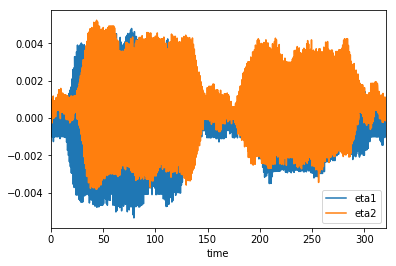

In [9]:
(read_waves(filename)
 .plot(x='time'))
plt.show()

In [10]:
read_waves(filename).describe()

,time,eta1,eta2
count,16035.000000,16035.000000,16035.000000
mean,160.340000,-0.000326,0.000636
std,92.581002,0.001886,0.001898
min,0.000000,-0.005350,-0.003810
25%,80.170000,-0.001430,-0.000660
50%,160.340000,-0.000400,0.000590
75%,240.510000,0.000770,0.001850
max,320.680000,0.004800,0.005240


We can see the data is recorded for five minutes and the elevation varied from $z\approx \pm 0.005$ meters. The plot shows a pretty nice wave case. There is a ramp up - a constant elevation section - and then the ramp down around 120 seconds later. But then... we see the same group again (with lower amplitude) after it reflects off the "beach".

### Quiz

Which wave probe was on the carriage?

- eta1
- eta2


Let's zoom in on the part of the data we want by `query`ing a range of times

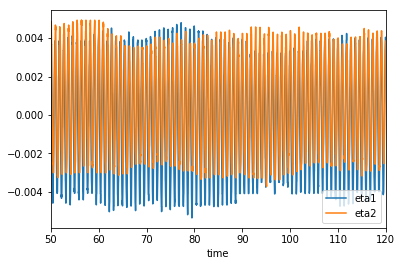

In [11]:
(read_waves(filename)
 .query('time>50 & time<120')
 .plot(x='time'))
plt.show()

Note that I have __piped__ the results from reading directly into the query and then into the plot function. This is called a _data pipeline_, and it is the best practise for data analysis. It clearly describes all the steps that went into a result and avoids lots of intermediate data structures we don't care about.